In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import os
import csv


In [53]:
def prep_dmv_sample(df, save=False, filename="clean_test_data.csv"):
    # Data prep from sample downloaded from web site database

    # Drop data with Result=NaN
    # Show them
    # df[df["Result"].isna()]

    original_length = len(df)
    print(f"Original length of sample data is {original_length}")

    # Add column result_std with NaN converted to None
    df["result_std"] = df.Result.fillna("None")  

    df = df.dropna(subset=["Result"])
    dropped_nan = original_length - len(df)
    print(f"{dropped_nan} tests with Result=NaN dropped")

    # Add column, ip, with the port number from the reported ip address
#     df["ip"] = ""
    df["ip"] = df.IPAddress.apply(lambda x: np.nan if x == None else x.split(":")[0])

In [6]:
    # Add column, duration, for the TotalTimeSpent in minutes
    df.loc["duration"] = df.TotalTimeSpent/60

    # Some events have more than 1 ip address
    df.loc["multiple_ip"] = df.ip.apply( lambda x: len(x.split(","))>1)

    # Remove the extra ip address from tests with more than 1 ip address
    df.loc[:,"ip"] = df.ip.apply(lambda x: x.split(",")[0])
    print(f'Extra ip address dropped in {len(df[df["multiple_ip"]])} tests')
    
    # Make a copy of the cleaned data
    if save:
        df.to_csv("clean_test_data.csv")
    return

In [54]:
sample_filename = "OPT11022021-11042021.csv"

# Read the sample data downloaded from the DMV testing web site
test_sample = pd.read_csv(sample_filename)

# Work with a shallow copy
df = test_sample.copy()
df["ip"] = df.IPAddress.apply(lambda x: np.nan if x == None else x.split(":")[0])

AttributeError: 'float' object has no attribute 'split'

In [49]:
# Clean up the raw data
prep_dmv_sample(df)

Original length of sample data is 4561
110 tests with Result=NaN dropped


/tmp/ipykernel_1987/1286549183.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ip"] = df.IPAddress.apply(lambda x: np.nan if x == None else x.split(":")[0])


In [50]:
df.columns


Index(['TestAttemptId', 'UserName', 'ExamineeId', 'TestId', 'LocaleId',
       'TestLocationId', 'KioskId', 'KioskAssignDate', 'TestRegistrationDate',
       'DownloadDate', 'TestStartDateTime', 'TestEndDateTime', 'TotalScore',
       'Result', 'ScoreCard', 'TimeLeft', 'CurrentQuestionId',
       'TotalQuestions', 'TotalQuestionsCorrect', 'TotalQuestionsIncorrect',
       'TotalTimeSpent', 'IsAudioEnabled', 'ReviewCount', 'TestFormat',
       'Status', 'IsManuallyEntered', 'ReasonId', 'CreateDate', 'CreateLogin',
       'UpdateDate', 'UpdateLogin', 'LastAnswerDate', 'IPAddress',
       'CancelReasonId', 'CancellationDate', 'CancellationLogin',
       'ApprovalLogin', 'TotalSkippedQuestions', 'CurrentTestStage',
       'SessionId', 'DifficultyLevel', 'ResultNotificationCount',
       'SessionTimeoutCount', 'PartnerUuid', 'PartnerTransmissionStatus',
       'PartnerTransmissionDate', 'FacialImageCount',
       'ImageCaptureQuestionNumbers', 'ExamineeId.1', 'ClientId',
       'PhotoDocume

In [4]:
def plt_duration(df, vlines=12., cum=False):
    """Chart the test duration histogram for passing result"""
    # Start 10 x 8 figure and point to axes object
    fig = plt.figure(figsize=(15,8))
    ax = plt.axes()

    # Use hist for each passing result
    plt.hist(df[df.result_std == "P"]["duration"], bins=100, density=False, \
             histtype="step", cumulative=cum, linewidth=2, label='Pass')
    plt.hist(df[df.result_std == "F"]["duration"], bins=100, density=False, \
             histtype="step", cumulative=cum, linewidth=2, label='Fail')
    plt.hist(df[df.result_std == "None"]["duration"], bins=100, density=False, \
             histtype="step", cumulative=cum, linewidth=2, label='None')
    
    # Draw a vertical line at the first peak of the passing histogram
    ax.axvline(x=vlines, color="red", linewidth=4, ls=":", label=f"{vlines} min")
    
    plt.title('DMV - Test Duration by Test Result')
    plt.xlabel('Frequency')
    plt.ylabel('Duration (min)')
    plt.legend()   # Uses labels assigned in plt.hist

    plt.show

KeyError: 'duration'

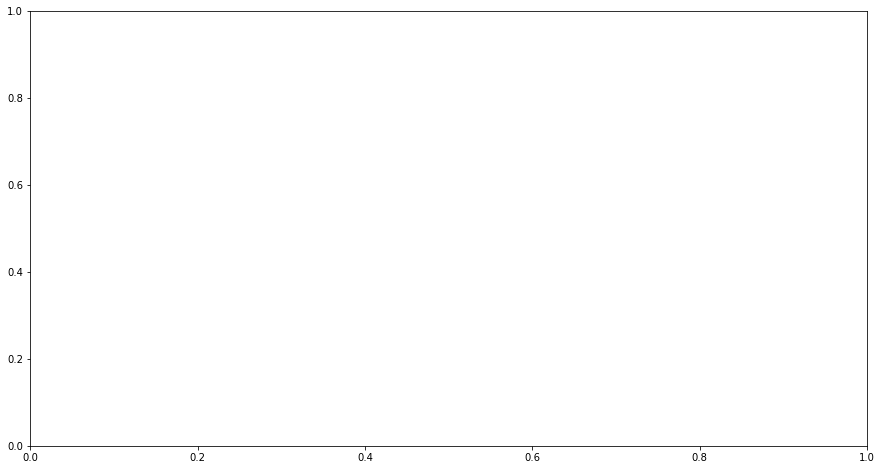

In [5]:
plt_duration(df)
plt_duration(df, cum=True)


In [ ]:
# Find index 

In [ ]:
# Show same data using a different plotting package, displot. 
# displot can alse calculate the kde (kernel density estimate)
def displot_duration(df):
    g1 = sns.displot(data=df, x='duration', stat='count', kind='hist', cumulative=False, kde=True, col='result_std', \
                 hue='result_std', palette='autumn', aspect=1.5, element='step', height=6, \
                 fill=True, linewidth=2, common_bins=False, common_norm=False, \
                 facet_kws={'sharex':True, 'sharey':True}
                 )
    return g1

displot_duration(df)


In [ ]:
def displot_kde_duration_all(df, peak1=12, peak2=20, bw_adjust=0.6):
    
#     plt.figure(figsize=(12,6))
    # sns.displot(data=df, x='TotalTimeSpent', stat='count', kind='kde', cumulative=False, kde=True, bw_adjust=.25,\
    g = sns.displot(data=df, x='duration', kind='kde', cumulative=False, bw_adjust=bw_adjust,\
#                      hue='result_std', \
                     palette='prism', aspect=1.5, height=6, \
                     fill=True, linewidth=2,  \
                     facet_kws={'sharex':True, 'sharey':True}
                     )

    g.fig.set_figwidth(15)
    g.fig.set_figheight(5)

    plt.axvline(x=peak1, color="red", linewidth=4, ls=":", label=f"Duration {peak1} min")
    plt.axvline(x=peak2, color="green", linewidth=4, ls=":", label=f"Duration {peak2} min")
    plt.title("DMV Test - Duration for All Tests")
    plt.legend()
    return g


displot_kde_duration_all(df, peak1=13.5, peak2=21, bw_adjust=.6)

In [ ]:
def displot_kde_duration(df, peak1=12, peak2=20, bw_adjust=0.6):
    
#     plt.figure(figsize=(12,6))
    # sns.displot(data=df, x='TotalTimeSpent', stat='count', kind='kde', cumulative=False, kde=True, bw_adjust=.25,\
    g = sns.displot(data=df, x='duration', kind='kde', cumulative=False, bw_adjust=bw_adjust,\
                     hue='result_std', palette='prism', aspect=1.5, height=6, \
                     fill=True, linewidth=2,  \
                     facet_kws={'sharex':True, 'sharey':True}
                     )

    g.fig.set_figwidth(15)
    g.fig.set_figheight(5)

    plt.axvline(x=peak1, color="red", linewidth=4, ls=":", label=f"Duration {peak1} min")
    plt.axvline(x=peak2, color="green", linewidth=4, ls=":", label=f"Duration {peak2} min")
    plt.title("DMV Test - Duration by Result")
    plt.legend()
    return g

g = displot_kde_duration(df, peak2=21)

The passed tests are bimodal with an early peak around 12 min. DMV officials think that the test should take more than 5 minutes. In fact, very few of the failing tests take less than 5 minutes. 

The dstribution of failed tests is unimodal with a slight broadening.

In [ ]:
def displot_kde_passed_partitions(df, quartiles, bw_adjust=0.6):
    
#     plt.figure(figsize=(12,6))
    # sns.displot(data=df, x='TotalTimeSpent', stat='count', kind='kde', cumulative=False, kde=True, bw_adjust=.25,\
    g = sns.displot(data=df, x='duration', kind='kde', cumulative=False, bw_adjust=bw_adjust,\
                     hue='result_std', palette='prism', aspect=1.5, height=6, \
                     fill=True, linewidth=2,  \
                     facet_kws={'sharex':True, 'sharey':True}
                     )

    g.fig.set_figwidth(15)
    g.fig.set_figheight(5)

    plt.vlines(quartiles, 0, 0.03, linewidth=2, ls=":")
#     plt.axvline(x=peak2, color="green", linewidth=4, ls=":", label=f"Duration {peak2} min")
    plt.title("DMV Test - Duration for Passed Tests - by Result - Shows Quartiles")
    plt.legend(labels=["Passed", "25%", "50%", "75%"])
    return g

In [ ]:
quartiles={ x:df[df.result_std==x]["duration"].describe() for x in ["P","F"] }
g = displot_kde_passed_partitions(df[df.result_std=="P"], list(quartiles["P"][["25%", "50%", "75%"]]) ) 

In [ ]:
# Add column suspect when TotalTimeSpent <= 5m (or 6.5m)
fastest = 12
passed = pd.DataFrame(df[df.result_std=="P"])


In [ ]:
passed["suspect"] = passed.duration.apply(lambda x: "suspect" if x <= fastest else "ok")

In [ ]:
def displot_suspect(df, bw_adjust=0.9):
    
    
    g1 = sns.displot(data=df, x='duration', hue='suspect', \
                     kind='hist', bins=50, \
                     stat="count", \
                     palette='autumn', aspect=2, \
                     fill=True, linewidth=2,  \
                     facet_kws={'sharex':True, 'sharey':True}
                     )
#     g1.fig.set_figwidth=(15)
#     g1.fig.set_figheight=(5)
#     plt.axvline(x=fastest, color="red", linewidth=4, ls=":", label="5 min")

displot_suspect(passed)

In [ ]:
def displot_2suspect(df, base="TotalQuestionsCorrect", compare="duration", suspect=True, fastest=15, bw_adjust=0.9):
    # Scatter plot showing the total questions that are answered correctly
    # by the total time to answer
    
    df.loc["suspect"] = df.duration.apply(lambda x: "suspect" if x <= fastest else "ok")
    
    case = "suspect" if suspect else "ok"
    
    sns.displot(data=df[df.suspect==case], x=compare, y='duration', \
                     kind="kde", \
                     palette='autumn', aspect=1, \
                     bins=10, \
                     )
    plt.title(f"{compare} vs Duration of Passed Tests {' <= ' if case=='suspect' else ' > '}{fastest} min ")


In [ ]:
# 
# displot_2suspect(passed[passed.suspect=="ok"])
# displot_2suspect(passed[passed.suspect=="suspect"])

displot_2suspect(passed, compare="TotalQuestionsCorrect", suspect=True, fastest=12)
displot_2suspect(passed, compare="TotalQuestionsCorrect", suspect=False, fastest=12)

For test taking more than 12 minutes there's a uniform number of correctly answered questions bewtween 41 an 47. For tests that take less than 12 min, it is not so uniform. There are a high numer of excellent score >48 for test that take 7-9 minutes. There's more very high scoring tests at 7-8 minutes. The number of correct answers appears to be trending to uniformity above 10 minutes.

In [ ]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def displot_xy(df, 
               base="TotalQuestionsCorrect", 
               compare="duration", 
               suspect=True, 
               fastest=12, 
               bw_adjust=0.9, 
               nminor = 1,
               bins=10):
    
    # Scatter plot showing the total questions that are answered correctly
    # by the total time to answer
    
    df["suspect"] = df.duration.apply(lambda x: "suspect" if x <= fastest else "not suspected")
    
    case = "suspect" if suspect else "not suspected"
    g = sns.displot(data=df[df.suspect==case], x=base, y=compare, \
#                      kind="kde", \
                     palette='autumn', aspect=1, \
                     bins=bins, \
                     cbar=True, \
                     )
    g.ax.yaxis.set_minor_locator(AutoMinorLocator(nminor + 1))
    plt.title(f"{base} vs {compare} {' <= ' if case=='suspected' else ' > '}{fastest} min ")

In [ ]:
displot_xy(passed)
displot_xy(passed, suspect=False)


In [ ]:
displot_xy(passed, compare="LocaleId", bins=100)
displot_xy(passed, suspect=False, compare="LocaleId", bins=30)

In [ ]:
displot_xy(passed, base="TotalQuestionsCorrect", compare="Height", bins=10, nminor=4)
displot_xy(passed, suspect=False, base="TotalQuestionsCorrect", compare="Height", bins=10, nminor=4)

In [ ]:
def ips_that_are_duplicated(df):
    d = {}
    for ip in df.ip:
        if ip in d:
            d[ip] += 1
        else:
            d[ip] = 1
    return { k:v for k,v in d.items() if v > 1 }

len(ips_that_are_duplicated(df))


In [ ]:
df[df.ip.duplicated(keep=False)]\
[["ip", "TestStartDateTime", "Result", "TotalQuestionsCorrect", "TotalTimeSpent", "Email", "Token"]]\
.sort_values(by=["ip", "TestStartDateTime"], axis="rows")


In [ ]:

displot_xy(df[df.ip.duplicated(keep=False)], base="TotalQuestionsCorrect", compare="duration", suspect=True, fastest=100, bw_adjust=0.9, bins=10)

In [ ]:
pd.options.display.min_rows=0
pd.options.display.max_rows=50


In [ ]:
df1 = df[df.ip.duplicated(keep=False)][["ip", "TestStartDateTime", "Result", "Email"]]
df1

In [ ]:
df1[df1.ip=="100.12.122.32"]